## Import Module

In [5]:
import pandas as pd
# Helpful for showing indexing information
pd.set_option('display.max_colwidth', 150)

import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, classification_report
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier

## Binary Classification
Build a binary classifier to classify the activity of each time window into static (0) and dynamic (1).

### Step 1: Load and Enlabel Data

In [6]:
df = pd.read_csv("/Users/ke/Desktop/UMICH/23 Winter/BIOSTAT 626/Midterm 1/training_data.txt", sep = " |    |\t")
df.head(5)

/var/folders/pv/kn0hk63x0c16cjm_kvl_wd880000gn/T/ipykernel_69755/591241069.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/Users/ke/Desktop/UMICH/23 Winter/BIOSTAT 626/Midterm 1/training_data.txt", sep = " |    |\t")


,subject,activity,F1,F2,F3,F4,F5,F6,F7,F8,...,F552,F553,F554,F555,F556,F557,F558,F559,F560,F561
0,1,5,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,1,5,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,1,5,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,1,5,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,1,5,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [7]:
label = pd.DataFrame(columns = ["target"])
label['target'] = df['subject']
for i in range(len(df)):
    if(df['activity'][i] >= 4):
        label['target'][i] = 0
    else:
        label['target'][i] = 1


static count:  4481
dynamic count:  3286


### Step 2: Distribution of Data

In [14]:
# Check the distribution of target variable 
print("static count: ", list(label['target']).count(0))
print("dynamic count: ",list(label['target']).count(1))

static count:  4481
dynamic count:  3286


We can see the distribution of binary target reponse is almost balanced.

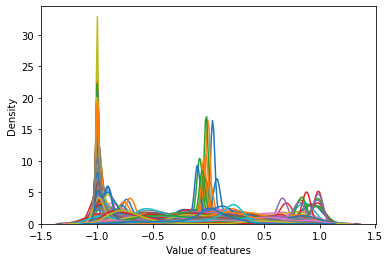

In [13]:
column = df.columns
for i in range(2, len(column)):
    sns.kdeplot(df[column[i]])
    plt.xlabel("Value of features")

Because the data have been processed, it can be seen that the distributions of almost all features are normal. Basically, the peak is centered on the values of -1, 0, and 1, and there is almost no skewness, so for the time being, the feature variables are not revised.

### Step 3: Standardized, Split and PCA Data

In [15]:
# Make Data Copy
data = df.copy()
# Since "activity" is target reponse and "subject" is only the number of subject, I chose to drop these features.
data.drop(['subject', 'activity'], axis = 1, inplace = True)
# Standarlize the Data
ss_x = StandardScaler()
ss_x.fit_transform(data)
x_std = ss_x.transform(data)
# I chose to divide data into train(60%) and test data(40%).
X_train, X_test, x_train1, x_test1, Y_train, Y_test = train_test_split(data, x_std, label, test_size = 0.4, random_state = 4)
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.4, random_state = 17)

0.9905434097276852


Text(0, 0.5, 'Accumulate explained variance ratio')

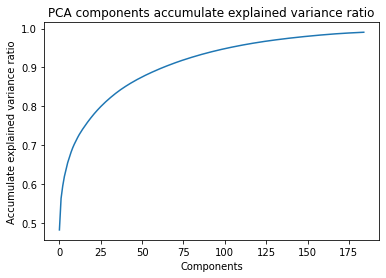

In [16]:
# PCA(Accumulate explained variance ratio > 99%)
pca = PCA(n_components = 185)
# pca.fit(x_std.T)
V = pca.fit_transform(x_std)
print(pca.explained_variance_ratio_.sum())
vx_train, vx_test, vy_train, vy_test = train_test_split(V, label, test_size = 0.4, random_state = 17)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("PCA components accumulate explained variance ratio")
plt.xlabel("Components")
plt.ylabel("Accumulate explained variance ratio")

### Step 4: Model selection (training data evaluation)

#### 1. Baseline algorith: K-Neighbors Classification

##### (1) Original Data

In [23]:
print("Start training knn")
knn = KNeighborsClassifier().fit(x_train, y_train)
print("Trainig done")
answer_knn = knn.predict(x_test)
print("Prediction done")
print("The classification report for knn:")
print(classification_report(vy_test, answer_knn))

Start training knn
Trainig done


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Prediction done
The classification report for knn:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      3107
   macro avg       1.00      1.00      1.00      3107
weighted avg       1.00      1.00      1.00      3107



##### (2) PCA Data

In [24]:
print("Start training knn")
knn = KNeighborsClassifier().fit(vx_train, vy_train)
print("Trainig done")
answer_knn = knn.predict(vx_test)
print("Prediction done")
print("The classification report for knn:")
print(classification_report(vy_test, answer_knn))

Start training knn
Trainig done


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Prediction done
The classification report for knn:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1796
           1       0.99      1.00      1.00      1311

    accuracy                           1.00      3107
   macro avg       1.00      1.00      1.00      3107
weighted avg       1.00      1.00      1.00      3107



#### 2. Decision Tree Classification

##### (1) Original Data

In [25]:
print("Start training dt")
dt = DecisionTreeClassifier().fit(x_train, y_train)
print("Trainig done")
answer_dt = dt.predict(x_test)
print("Prediction done")
print("The classification report for dt:")
print(classification_report(y_test, answer_dt))

Start training dt
Trainig done
Prediction done
The classification report for dt:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      3107
   macro avg       1.00      1.00      1.00      3107
weighted avg       1.00      1.00      1.00      3107



##### (2) PCA Data

In [26]:
print("Start training dt")
dt = DecisionTreeClassifier().fit(vx_train, vy_train)
print("Trainig done")
answer_dt = dt.predict(vx_test)
print("Prediction done")
print("The classification report for dt:")
print(classification_report(vy_test, answer_dt))

Start training dt
Trainig done
Prediction done
The classification report for dt:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1796
           1       0.99      0.99      0.99      1311

    accuracy                           0.99      3107
   macro avg       0.99      0.99      0.99      3107
weighted avg       0.99      0.99      0.99      3107



#### 3. Gaussian Naive Bayes Classification

##### (1) Original Data

In [28]:
print("Start training gnb")
gnb = GaussianNB().fit(x_train, y_train)
print("Trainig done")
answer_gnb = gnb.predict(x_test)
print("Prediction done")
print("The classification report for gnb:")
print(classification_report(y_test, answer_gnb))

Start training gnb
Trainig done
Prediction done
The classification report for gnb:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1796
           1       0.98      0.99      0.99      1311

    accuracy                           0.99      3107
   macro avg       0.99      0.99      0.99      3107
weighted avg       0.99      0.99      0.99      3107



/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### (2) PCA Data

In [29]:
print("Start training gnb")
gnb = GaussianNB().fit(vx_train, vy_train)
print("Trainig done")
answer_gnb = gnb.predict(vx_test)
print("Prediction done")
print("The classification report for gnb:")
print(classification_report(vy_test, answer_gnb))

Start training gnb
Trainig done
Prediction done
The classification report for gnb:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1796
           1       0.81      0.69      0.75      1311

    accuracy                           0.80      3107
   macro avg       0.80      0.79      0.79      3107
weighted avg       0.80      0.80      0.80      3107



/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 4. Support Vector Classification

##### (1) Original Data

In [30]:
print("Start training svc")
svc = SVC().fit(x_train, y_train)
print("Trainig done")
answer_svc = svc.predict(x_test)
print("Prediction done")
print("The classification report for svc:")
print(classification_report(y_test, answer_svc))

Start training svc


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig done
Prediction done
The classification report for svc:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      3107
   macro avg       1.00      1.00      1.00      3107
weighted avg       1.00      1.00      1.00      3107



##### (2) PCA Data

In [31]:
print("Start training svc")
svc = SVC().fit(vx_train, vy_train)
print("Trainig done")
answer_svc = svc.predict(vx_test)
print("Prediction done")
print("The classification report for svc:")
print(classification_report(vy_test, answer_svc))

Start training svc
Trainig done


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction done
The classification report for svc:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      3107
   macro avg       1.00      1.00      1.00      3107
weighted avg       1.00      1.00      1.00      3107



#### 5. Bagging Classification

##### (1) Original Data

In [32]:
print("Start training bagging")
bc = BaggingClassifier().fit(x_train, y_train)
print("Trainig done")
answer_bc = bc.predict(x_test)
print("Prediction done")
print("The classification report for bagging:")
print(classification_report(y_test, answer_bc))

Start training bagging


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig done
Prediction done
The classification report for bagging:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       1.00      0.99      1.00      1311

    accuracy                           1.00      3107
   macro avg       1.00      1.00      1.00      3107
weighted avg       1.00      1.00      1.00      3107



##### (2) PCA Data

In [33]:
print("Start training bagging")
bc = BaggingClassifier().fit(vx_train, vy_train)
print("Trainig done")
answer_bc = bc.predict(vx_test)
print("Prediction done")
print("The classification report for bagging:")
print(classification_report(vy_test, answer_bc))

Start training bagging


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig done
Prediction done
The classification report for bagging:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       0.99      1.00      1.00      1311

    accuracy                           1.00      3107
   macro avg       1.00      1.00      1.00      3107
weighted avg       1.00      1.00      1.00      3107



#### 6. MLP Classification

##### (1) Original Data

In [34]:
from sklearn.neural_network import MLPClassifier
print("Start training neural network")
mlp = MLPClassifier().fit(x_train, y_train)
print("Trainig done")
answer_mlp = mlp.predict(x_test)
print("Prediction done")
print("The classification report for neural network:")
print(classification_report(y_test, answer_mlp))

Start training neural network


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig done
Prediction done
The classification report for neural network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      3107
   macro avg       1.00      1.00      1.00      3107
weighted avg       1.00      1.00      1.00      3107



##### (2) PCA Data

In [35]:
from sklearn.neural_network import MLPClassifier
print("Start training neural network")
mlp = MLPClassifier().fit(vx_train, vy_train)
print("Trainig done")
answer_mlp = mlp.predict(vx_test)
print("Prediction done")
print("The classification report for neural network:")
print(classification_report(vy_test, answer_mlp))

Start training neural network


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig done
Prediction done
The classification report for neural network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      3107
   macro avg       1.00      1.00      1.00      3107
weighted avg       1.00      1.00      1.00      3107



### Step 5: Load Test Data and PCA

In [36]:
# Load Test data
testdata = pd.read_csv("/Users/ke/Desktop/UMICH/23 Winter/BIOSTAT 626/Midterm 1/test_data.txt", sep = " |    |\t")
test_data = testdata.copy()
test_data.drop(['subject'], axis = 1, inplace = True)
#Standardized data
ss_x = StandardScaler()
ss_x.fit_transform(test_data)
x_std = ss_x.transform(test_data)

/var/folders/pv/kn0hk63x0c16cjm_kvl_wd880000gn/T/ipykernel_69755/2146471453.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  testdata = pd.read_csv("/Users/ke/Desktop/UMICH/23 Winter/BIOSTAT 626/Midterm 1/test_data.txt", sep = " |    |\t")


0.9909309810528458


Text(0, 0.5, 'Accumulate explained variance ratio')

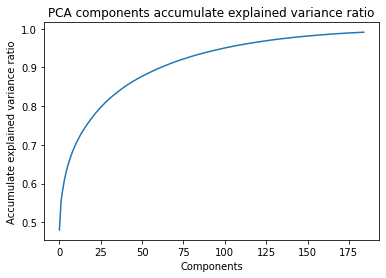

In [38]:
# PCA 
pca = PCA(n_components = 185)
# pca.fit(x_std.T)
V_test = pca.fit_transform(x_std)
print(pca.explained_variance_ratio_.sum())
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("PCA components accumulate explained variance ratio")
plt.xlabel("Components")
plt.ylabel("Accumulate explained variance ratio")

### Step 6: Obtain the results

In [39]:
print("Start training svc")
svc = SVC().fit(data, label)
print("Trainig done")
answer_svc = svc.predict(test_data)
print("Prediction done")
new = pd.DataFrame(answer_svc.T)
# new.to_excel("/Users/ke/Desktop/UMICH/23 Winter/BIOSTAT 626/Midterm 1/svc_result.xlsx")

Start training svc


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig done
Prediction done


## Multi-class Classification
Build a refined multi-class classifier to classify walking (1), walking_upstairs (2), walking_downstairs (3), sitting (4), standing (5), lying (6), and static postural transition (7)

### Step 1: Enlabel Data

In [46]:
label = pd.DataFrame(columns = ["target"])
label['target'] = df['subject']
for i in range(len(df)):
    if(df['activity'][i] < 7):
        label['target'][i] = df['activity'][i]
    else:
        label['target'][i] = 7

### Step 2: Observe Data

In [89]:
print("Walking 1:")
print("Count: ", list(label['target']).count(1))
print("Percentage: ",round(list(label['target']).count(1)/7767, 2), "\n")
print("Walking_upstairs 2: ")
print("Count: ",list(label['target']).count(2))
print("Percentage: ",round(list(label['target']).count(2)/7767, 2), "\n")
print("Walking_downstairs 3:")
print("Count: ",list(label['target']).count(3))
print("Percentage: ",round(list(label['target']).count(3)/7767, 2), "\n")
print("Sitting 4:")
print("Count: ",list(label['target']).count(4))
print("Percentage: ",round(list(label['target']).count(4)/7767, 2), "\n")
print("Standing 5:")
print("Count: ",list(label['target']).count(5))
print("Percentage: ",round(list(label['target']).count(5)/7767, 2), "\n")
print("Lying 6:")
print("Count: ",list(label['target']).count(6))
print("Percentage: ",round(list(label['target']).count(6)/7767, 2), "\n")
print("Static postural transition 7:")
print("Count: ",list(label['target']).count(7))
print("Percentage: ",round(list(label['target']).count(7)/7767, 2))

Walking 1:
Count:  1226
Percentage:  0.16 

Walking_upstairs 2: 
Count:  1073
Percentage:  0.14 

Walking_downstairs 3:
Count:  987
Percentage:  0.13 

Sitting 4:
Count:  1293
Percentage:  0.17 

Standing 5:
Count:  1423
Percentage:  0.18 

Lying 6:
Count:  1413
Percentage:  0.18 

Static postural transition 7:
Count:  352
Percentage:  0.05


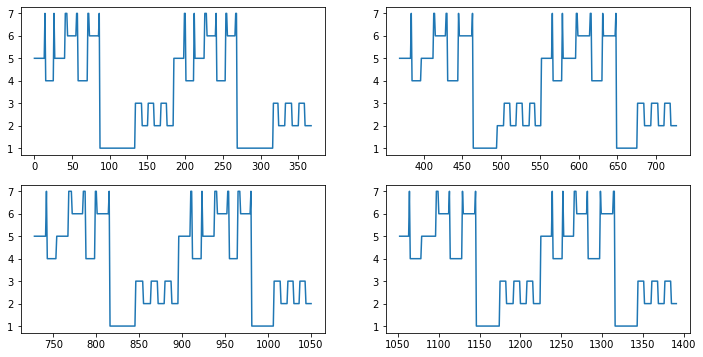

In [90]:
fig = plt.figure(figsize = (12,6))
plt.subplot(221)
subject1 = label[0:368]
plt.plot(subject1['target'])
plt.subplot(222)
subject2 = label[369:727]
plt.plot(subject2['target'])
plt.subplot(223)
subject3 = label[728:1051]
plt.plot(subject3['target'])
plt.subplot(224)
subject4 = label[1052:1392]
plt.plot(subject4['target'])

Observe the trend of the label by 4 subjects.
We can see that label=7 means that there is a transition in the action, and generally, after label=7 the label will change. And we can see that label will generally remain stable for a period of time (i.e., except for label = 7, there is basically no rapid change of label.)

### Step 3: Standardized, Split and PCA Data

In [91]:
data = df.copy()
data.drop(['subject', 'activity'], axis = 1, inplace = True)
ss_x = StandardScaler()
ss_x.fit_transform(data)
x_std = ss_x.transform(data)
X_train, X_test, x_train1, x_test1, Y_train, Y_test = train_test_split(data, x_std, label, test_size = 0.4, random_state = 4)
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.4, random_state = 1)

0.9905347255980246


Text(0, 0.5, 'Accumulate explained variance ratio')

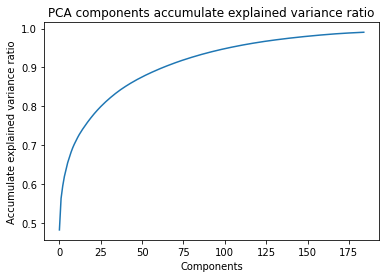

In [93]:
pca = PCA(n_components = 185)
V = pca.fit_transform(x_std)
print(pca.explained_variance_ratio_.sum())
vx_train, vx_test, vy_train, vy_test = train_test_split(V, label, test_size = 0.4, random_state = 1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("PCA components accumulate explained variance ratio")
plt.xlabel("Components")
plt.ylabel("Accumulate explained variance ratio")

### Step 4: Model Selection

#### 1. K-Neighbors Classification

##### (1) Original Data

In [94]:
print("Start training knn")
knn = KNeighborsClassifier().fit(x_train, y_train)
answer_knn = knn.predict(x_test)
print("Prediction done")
print("The classification report for knn:")
print(classification_report(y_test, answer_knn))

Start training knn


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Prediction done
The classification report for knn:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       500
           2       0.98      1.00      0.99       407
           3       1.00      0.98      0.99       383
           4       0.91      0.86      0.89       533
           5       0.89      0.92      0.90       577
           6       0.99      1.00      1.00       566
           7       0.98      0.94      0.96       141

    accuracy                           0.96      3107
   macro avg       0.96      0.96      0.96      3107
weighted avg       0.96      0.96      0.96      3107



##### (2) PCA Data

In [95]:
print("Start training knn")
knn = KNeighborsClassifier().fit(vx_train, vy_train)
answer_knn = knn.predict(vx_test)
print("Prediction done")
print("The classification report for knn:")
print(classification_report(vy_test, answer_knn))

Start training knn


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Prediction done
The classification report for knn:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       500
           2       0.96      0.99      0.98       407
           3       0.99      0.98      0.99       383
           4       0.94      0.86      0.90       533
           5       0.88      0.95      0.92       577
           6       0.99      0.99      0.99       566
           7       0.99      0.90      0.94       141

    accuracy                           0.96      3107
   macro avg       0.96      0.95      0.96      3107
weighted avg       0.96      0.96      0.96      3107



#### 2. Decision Tree Classification

##### (1) Original Data

In [96]:
print("Start training dt")
dt = DecisionTreeClassifier().fit(x_train, y_train)
print("Trainig done")
answer_dt = dt.predict(x_test)
print("Prediction done")
print("The classification report for dt:")
print(classification_report(y_test, answer_dt))

Start training dt
Trainig done
Prediction done
The classification report for dt:
              precision    recall  f1-score   support

           1       0.94      0.95      0.94       500
           2       0.93      0.89      0.91       407
           3       0.91      0.92      0.91       383
           4       0.92      0.92      0.92       533
           5       0.93      0.93      0.93       577
           6       0.99      0.99      0.99       566
           7       0.95      0.96      0.95       141

    accuracy                           0.94      3107
   macro avg       0.94      0.94      0.94      3107
weighted avg       0.94      0.94      0.94      3107



##### (2) PCA Data

In [97]:
print("Start training dt")
dt = DecisionTreeClassifier().fit(vx_train, vy_train)
print("Trainig done")
answer_dt = dt.predict(vx_test)
print("Prediction done")
print("The classification report for dt:")
print(classification_report(vy_test, answer_dt))

Start training dt
Trainig done
Prediction done
The classification report for dt:
              precision    recall  f1-score   support

           1       0.84      0.84      0.84       500
           2       0.76      0.73      0.74       407
           3       0.77      0.80      0.79       383
           4       0.71      0.71      0.71       533
           5       0.76      0.76      0.76       577
           6       0.94      0.95      0.95       566
           7       0.93      0.88      0.90       141

    accuracy                           0.81      3107
   macro avg       0.82      0.81      0.81      3107
weighted avg       0.81      0.81      0.81      3107



#### 3. Gussian Naive Bayes Classification

##### (1) Original Data

In [98]:
print("Start training gnb")
gnb = GaussianNB().fit(x_train, y_train)
print("Trainig done")
answer_gnb = gnb.predict(x_test)
print("Prediction done")
print("The classification report for gnb:")
print(classification_report(y_test, answer_gnb))

Start training gnb
Trainig done
Prediction done
The classification report for gnb:
              precision    recall  f1-score   support

           1       0.95      0.70      0.80       500
           2       0.67      0.85      0.75       407
           3       0.78      0.80      0.79       383
           4       0.50      0.84      0.63       533
           5       0.83      0.55      0.66       577
           6       0.98      0.59      0.74       566
           7       0.65      0.98      0.78       141

    accuracy                           0.72      3107
   macro avg       0.77      0.76      0.74      3107
weighted avg       0.79      0.72      0.73      3107



/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### (2) PCA Data

In [99]:
print("Start training gnb")
gnb = GaussianNB().fit(vx_train, vy_train)
print("Trainig done")
answer_gnb = gnb.predict(vx_test)
print("Prediction done")
print("The classification report for gnb:")
print(classification_report(vy_test, answer_gnb))

Start training gnb
Trainig done
Prediction done
The classification report for gnb:
              precision    recall  f1-score   support

           1       0.75      0.64      0.69       500
           2       0.59      0.86      0.70       407
           3       0.60      0.55      0.58       383
           4       0.93      0.78      0.85       533
           5       0.87      0.88      0.87       577
           6       0.99      0.93      0.96       566
           7       0.75      0.87      0.80       141

    accuracy                           0.79      3107
   macro avg       0.78      0.79      0.78      3107
weighted avg       0.81      0.79      0.79      3107



/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 4. Support Vector Classification

##### (1) Original Data

In [101]:
print("Start training svc")
svc = SVC().fit(x_train, y_train)
print("Trainig done")
answer_svc = svc.predict(x_test)
print("Prediction done")
print("The classification report for svc:")
print(classification_report(y_test, answer_svc))

Start training svc


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig done
Prediction done
The classification report for svc:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       500
           2       0.99      1.00      0.99       407
           3       1.00      1.00      1.00       383
           4       0.95      0.89      0.92       533
           5       0.91      0.95      0.93       577
           6       1.00      1.00      1.00       566
           7       0.98      0.97      0.98       141

    accuracy                           0.97      3107
   macro avg       0.97      0.97      0.97      3107
weighted avg       0.97      0.97      0.97      3107



##### (2) PCA Data

In [102]:
print("Start training svc")
svc = SVC().fit(vx_train, vy_train)
print("Trainig done")
answer_svc = svc.predict(vx_test)
print("Prediction done")
print("The classification report for svc:")
print(classification_report(vy_test, answer_svc))

Start training svc


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig done
Prediction done
The classification report for svc:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       407
           3       0.99      1.00      0.99       383
           4       0.94      0.91      0.92       533
           5       0.93      0.94      0.93       577
           6       1.00      1.00      1.00       566
           7       0.97      0.99      0.98       141

    accuracy                           0.97      3107
   macro avg       0.97      0.97      0.97      3107
weighted avg       0.97      0.97      0.97      3107



#### 5. Bagging Classification

##### (1) Original Data

In [103]:
print("Start training bagging")
bc = BaggingClassifier().fit(x_train, y_train)
print("Trainig done")
answer_bc = bc.predict(x_test)
print("Prediction done")
print("The classification report for bagging:")
print(classification_report(y_test, answer_bc))

Start training bagging


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig done
Prediction done
The classification report for bagging:
              precision    recall  f1-score   support

           1       0.99      0.96      0.97       500
           2       0.95      0.96      0.96       407
           3       0.95      0.97      0.96       383
           4       0.94      0.93      0.93       533
           5       0.94      0.94      0.94       577
           6       0.99      1.00      1.00       566
           7       0.94      0.96      0.95       141

    accuracy                           0.96      3107
   macro avg       0.96      0.96      0.96      3107
weighted avg       0.96      0.96      0.96      3107



##### (2) PCA Data

In [104]:
print("Start training bagging")
bc = BaggingClassifier().fit(vx_train, vy_train)
print("Trainig done")
answer_bc = bc.predict(vx_test)
print("Prediction done")
print("The classification report for bagging:")
print(classification_report(vy_test, answer_bc))

Start training bagging


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig done
Prediction done
The classification report for bagging:
              precision    recall  f1-score   support

           1       0.88      0.95      0.91       500
           2       0.87      0.85      0.86       407
           3       0.88      0.85      0.87       383
           4       0.80      0.79      0.79       533
           5       0.83      0.83      0.83       577
           6       0.97      0.97      0.97       566
           7       0.97      0.86      0.91       141

    accuracy                           0.87      3107
   macro avg       0.88      0.87      0.88      3107
weighted avg       0.87      0.87      0.87      3107



#### 6. MLP Classification

##### (1) Original Data

In [105]:
print("Start training neural network")
mlp = MLPClassifier().fit(x_train, y_train)
print("Trainig done")
answer_mlp = mlp.predict(x_test)
print("Prediction done")
print("The classification report for neural network:")
print(classification_report(y_test, answer_mlp))

Start training neural network


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig done
Prediction done
The classification report for neural network:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       500
           2       0.99      1.00      1.00       407
           3       1.00      0.99      1.00       383
           4       0.95      0.95      0.95       533
           5       0.96      0.96      0.96       577
           6       0.99      1.00      1.00       566
           7       0.99      0.94      0.96       141

    accuracy                           0.98      3107
   macro avg       0.98      0.98      0.98      3107
weighted avg       0.98      0.98      0.98      3107



##### (2) PCA Data

In [106]:
print("Start training neural network")
mlp = MLPClassifier().fit(vx_train, vy_train)
print("Trainig done")
answer_mlp = mlp.predict(vx_test)
print("Prediction done")
print("The classification report for neural network:")
print(classification_report(vy_test, answer_mlp))

Start training neural network


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig done
Prediction done
The classification report for neural network:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       500
           2       0.99      1.00      0.99       407
           3       1.00      0.99      0.99       383
           4       0.94      0.95      0.94       533
           5       0.95      0.95      0.95       577
           6       0.99      1.00      0.99       566
           7       0.99      0.94      0.96       141

    accuracy                           0.98      3107
   macro avg       0.98      0.97      0.98      3107
weighted avg       0.98      0.98      0.98      3107



### Step 5: Parameter Choose
Using grid search to choose the parameter of svc model

In [107]:
param_grid = {'gamma':   [1e-21, 1e-13, 1e-11, 1e-9, 1e-7], 'C':   [0.05, 0.10, 0.15, 1, 10]}
linear_svr_cg = GridSearchCV(SVC(kernel = "linear"), param_grid, cv = 5,n_jobs = -1,verbose = 1)
linear_svr_cg.fit(data, label)
print("Linear_SVR: ", linear_svr_cg.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear_SVR:  {'C': 1, 'gamma': 1e-21}


### Step 6: Predict and Data Correction
According to step 2, we observed some properties of label distribution, based on those properties I chose to do some data correction to improve the prediction result.

In [108]:
print("Start training svc")
svc = SVC(kernel = "linear", C = 1).fit(data, label)
print("Trainig done")
answer_svc = svc.predict(test_data)
for i in range(2, len(answer_svc) - 2):
    if(answer_svc[i] != answer_svc[i-1] and answer_svc[i] == 4):
        if(answer_svc[i-1] == answer_svc[i+1] == 5):
            answer_svc[i] = 5
        elif(answer_svc[i-1] == 2 and answer_svc[i+1] == answer_svc[i+2] == 5):
            answer_svc[i] = 5
        elif(answer_svc[i-1] == answer_svc[i+2] == 5):
            answer_svc[i] = 5
    elif(answer_svc[i] != answer_svc[i-1] and answer_svc[i] == 5):
        if(answer_svc[i-1] == answer_svc[i+1] == 4):
            answer_svc[i] = 4
        elif(answer_svc[i-1] == answer_svc[i+2] == 4):
            answer_svc[i] = 4
        elif(answer_svc[i-1] == answer_svc[i-2] == 4 and answer_svc[i+2] == 7):
            answer_svc[i] = 4
        elif(answer_svc[i-1] == 4 and answer_svc[i+1] ==7):
            answer_svc[i] = 4
    elif(answer_svc[i] == 1 and answer_svc[i] != answer_svc[i-1]):
        if(answer_svc[i-1] == answer_svc[i+1] == 2 or answer_svc[i-1] == answer_svc[i+1] == 3):
            answer_svc[i] = answer_svc[i-1]
        elif(answer_svc[i-1] == answer_svc[i+2] == 2):
            answer_svc[i] = 2
    elif(answer_svc[i] == 3 and answer_svc[i] != answer_svc[i-1]):
        if(answer_svc[i-1] == answer_svc[i+2] == 1):
            answer_svc[i] = 1
        elif(answer_svc[i-1] == answer_svc[i+2] == 2):
            answer_svc[i] = 2
    elif(answer_svc[i] == 2 and answer_svc[i] != answer_svc[i-1]):
        if(answer_svc[i-1] == answer_svc[i+1] == 1 or answer_svc[i-1] == answer_svc[i+1] == 3):
            answer_svc[i] = answer_svc[i-1]
print("Prediction done")
# new = pd.DataFrame(answer_svc.T)
# new.to_excel("/Users/ke/Desktop/UMICH/23 Winter/BIOSTAT 626/Midterm 1/multi_svc_result_new.xlsx")

Start training svc


/Users/ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig done
Prediction done
